In [0]:
#Import dependencies
import cv2
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib


In [0]:
#Set Spark conf to access ADLS
spark.conf.set(f"fs.azure.account.auth.type.{dbutils.secrets.get('storageaccount', 'storageaccount')}.dfs.core.windows.net", "SAS")
spark.conf.set(f"fs.azure.sas.token.provider.type.{dbutils.secrets.get('storageaccount', 'storageaccount')}.dfs.core.windows.net", "org.apache.hadoop.fs.azurebfs.sas.FixedSASTokenProvider")
spark.conf.set(f"fs.azure.sas.fixed.token.{dbutils.secrets.get('storageaccount', 'storageaccount')}.dfs.core.windows.net", f"{dbutils.secrets.get('storageaccount', 'sastoken')}")

In [0]:
#Read image from ADLS as Spark DF
df = spark.read.format("image").load(f"abfss://nga-ml@{dbutils.secrets.get('storageaccount', 'storageaccount')}.dfs.core.windows.net/clean_room_2.jpg")

In [0]:
#Show image metadata
df.select("image.height", "image.width"
         ,"image.nChannels", "image.mode"
         ,"image.data").show()

+------+-----+---------+----+--------------------+
|height|width|nChannels|mode|                data|
+------+-----+---------+----+--------------------+
|  1000|  667|        3|  16|[7B 7C 8A 7A 7B 8...|
+------+-----+---------+----+--------------------+



In [0]:
#Convert bytearray to numpy ndarray
img_array = np.array(df.select('image.data').collect()[0]['data'])

#Reshape numpy.ndarray to height x width x channels
img_array = img_array.reshape((1000, 667, 3))

#Check shape
img_array.shape

Out[9]: (1000, 667, 3)

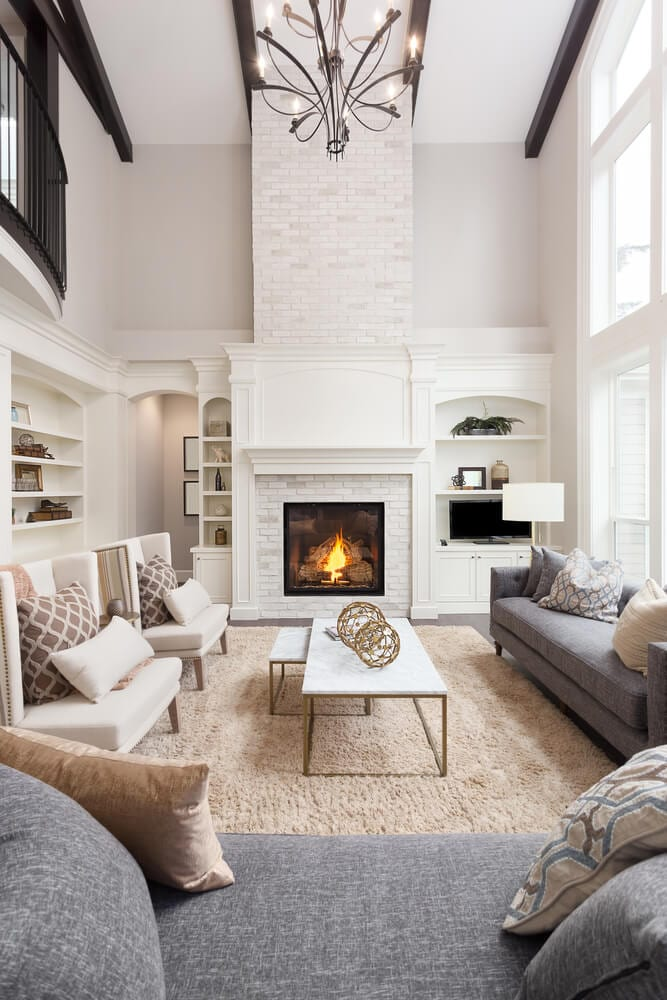

In [0]:
#View image
from dbruntime.patches import cv2_imshow
cv2_imshow(img_array)

In [0]:
#Mount ADLS
config = {"fs.azure.account.key.teststorageaccount1171.blob.core.windows.net": "<Access Key>"}

dbutils.fs.mount(
  source = "wasbs://nga-ml@teststorageaccount1171.blob.core.windows.net",
  mount_point = "/mnt/nga-ml",
  extra_configs = config)

Out[22]: True

In [0]:
# Load image datasets using TF
data = tf.keras.utils.image_dataset_from_directory("/dbfs/mnt/nga-ml")

Found 10 files belonging to 2 classes.
